In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pickle as pk
from skimage import io
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Input,MaxPooling2D
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout
import torch
#torch.cuda.get_device_name(0)

In [2]:
!gdown --id 1752sGS4N_LRusxVSkiopZDCeQPSC94bz
!unzip stats.zip
#120x90
#!gdown --id 1NfYwSSOdc4od2TrRZZiw8QvPq2PIsyL3
#!unzip default.zip
#320x180
!gdown --id 1a7bt8D3Mfl08rgwwj5VTs1KGYVZThWsp
!unzip medium.zip

Streaming output truncated to the last 5000 lines.
  inflating: part5/id-iWZ2qoL-4s_video.jpg  
  inflating: part5/id-iwZkj-rQ7s_video.jpg  
  inflating: part5/id-IwZOgiMdXE_video.jpg  
  inflating: part5/id-Iw_i1agPAg_video.jpg  
  inflating: part5/id-ix0hiANN5k_video.jpg  
  inflating: part5/id-IX0tszQF7c_video.jpg  
  inflating: part5/id-iX1DuaXXf0_video.jpg  
  inflating: part5/id-iX3qxRMUoQ_video.jpg  
  inflating: part5/id-ix4o1SyMKw_video.jpg  
  inflating: part5/id-Ix4rY8U01E_video.jpg  
  inflating: part5/id-ix5HC11lXY_video.jpg  
  inflating: part5/id-ix6nXLShpg_video.jpg  
  inflating: part5/id-iX6XhM_fdw_video.jpg  
  inflating: part5/id-Ix9JCPXWi8_video.jpg  
  inflating: part5/id-ixAIXmMAXY_video.jpg  
  inflating: part5/id-iXalNPd64E_video.jpg  
  inflating: part5/id-IxAua9QaxI_video.jpg  
  inflating: part5/id-ixAyDF8Gmg_video.jpg  
  inflating: part5/id-Ixb5YwGquY_video.jpg  
  inflating: part5/id-IxbeWRmHNQ_video.jpg  
  inflating: part5/id-ixbf9ydVVI_video.jpg  
  in

In [3]:
#podemos revisar previamente para ver cuantas imagenes del tipo correcto
#existen en cada parte


[0, 8816, 17658, 26456, 35293, 44107]
[8816, 8842, 8798, 8837, 8814]
0
2000
2000
433
58
61
1
2000
2000
867
117
123
2
2000
2000
1300
175
184
3
2000
2000
1734
234
246
4
2000
2000
2000
292
307
views de 0  3543
tipo de views 0 <class 'str'>
Len train images 6599
[['/m/04rlf', '/m/04rlf'], ['/m/098wr', '/m/098wr'], ['/m/04rlf', '/m/064t9'], ['/m/0bzvm2', '/m/0bzvm2'], ['/m/0bzvm2', '/m/0bzvm2', '/m/0403l3g'], ['/m/01h6rj', '/m/04rlf', '/m/04rlf'], ['/m/07yv9', '/m/0410tth', '/m/019_rr', '/m/019_rr', '/m/07yv9', '/m/0410tth'], ['/m/019_rr', '/m/019_rr', '/m/03glg'], ['/m/02jjt', '/m/02jjt', '/m/02vxn'], ['/m/019_rr', '/m/019_rr', '/m/03glg'], ['/m/02wbm', '/m/019_rr', '/m/019_rr', '/m/02wbm'], ['/m/02jjt', '/m/02jjt'], ['/m/025zzc', '/m/0bzvm2', '/m/0bzvm2', '/m/025zzc'], ['/m/019_rr', '/m/019_rr', '/m/07c1v'], ['/m/04rlf'], ['/m/019_rr', '/m/019_rr', '/m/07yv9'], ['/m/04rlf', '/m/02lkt', '/m/04rlf', '/m/02lkt'], ['/m/02vx4', '/m/06ntj', '/m/06ntj', '/m/02vx4'], ['/m/07yv9', '/m/019_rr', '/m

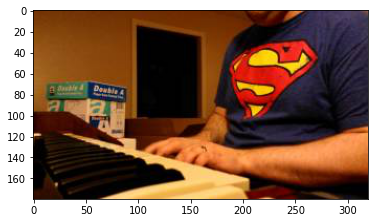

In [4]:
#definimos la cantidad de imagenes que queremos por categoria para entrenar
maxTrainCount = 2000
partsToUse = 5

#imgIDs, views, likes, dislikes, comments = []
imgIDs = []
views = []
trainImages = []
trainLabels = []
topicIds = []
partSize = []
offsetSize = []

offsetSize.append(0)

for i in range(partsToUse):
  auxImgIDs, auxViews, auxLikes, auxDislikes, auxComments, auxTopicIds = pk.load(open("./stats/part" + str(i+1) + ".pickle", "rb"))
  imgIDs += auxImgIDs
  views += auxViews
  topicIds += auxTopicIds
  offsetSize.append(len(imgIDs))
  partSize.append(len(auxImgIDs))
  
print(offsetSize)
print(partSize)

  #print("unpickle","./stats/part",str(i+1),".pickle")

#auxImage = io.imread("part" + str(i) +  "/" + imgIDs[i + partSize[j]] + ".jpg")

j = 0
num0s = 0
num1s = 0
num2s = 0
num3s = 0
num4s = 0

while (j < 5):
  print(j)
  for i in range(partSize[j]):
    #para img 320x180
    auxImage = io.imread("part" + str(j+1) +  "/" + imgIDs[i + offsetSize[j]] + ".jpg")
    #para img 120x90
    #auxImage = io.imread("default/part" + str(j+1) +  "/" + imgIDs[i + offsetSize[j]] + ".jpg")
    #trainImages.append(auxImage)
    #esto previamente causaba un desync
    auxView = 0
    if (views[i] != None):
      auxView = int(views[i])
    #if (auxView < 1000):
      #trainLabels.append(0)
      #ignore
      #print(" 0")
    if (auxView < 10000) and (num0s < maxTrainCount):
      num0s += 1
      trainImages.append(auxImage)
      trainLabels.append(0)
      #print(" 1")
    elif (auxView >= 10000) and (auxView < 100000) and (num1s < maxTrainCount):
      num1s += 1
      trainImages.append(auxImage)
      trainLabels.append(1)
      #print(" 2")
    elif (auxView >= 100000) and (auxView < 500000) and (num2s < maxTrainCount):
      num2s += 1
      trainImages.append(auxImage)
      trainLabels.append(2)
      #print(" 3")
    elif (auxView >= 500000) and (auxView < 1000000) and (num3s < maxTrainCount):
      num3s += 1
      trainImages.append(auxImage)
      trainLabels.append(3)
      #print(" 4")
    elif (auxView >= 1000000) and (num4s < maxTrainCount):
      num4s += 1
      trainImages.append(auxImage)
      trainLabels.append(4)
      #print(" 5")
    
  print(num0s)
  print(num1s)
  print(num2s)
  print(num3s)
  print(num4s)
  if (num0s == maxTrainCount) and (num1s == maxTrainCount) and (num2s == maxTrainCount) and (num3s == maxTrainCount) and (num4s == maxTrainCount):
    print("ya esta todo")
    break
  j += 1


print("views de 0 ", views[0])
print("tipo de views 0", type(views[0]))
print("Len train images", len(trainImages))

#print(topicIds)
#print(type(topicIds))
plt.imshow(trainImages[0])

In [5]:
print(type(trainImages))
print(type(trainLabels))
print(len(trainImages))

#print(trainImages[0])
#print(trainImages[0][0])
#print(trainImages[0][0][0])
#print(type(trainImages[0]))
#print(type(trainImages[0][0][0][0]))

<class 'list'>
<class 'list'>
6599


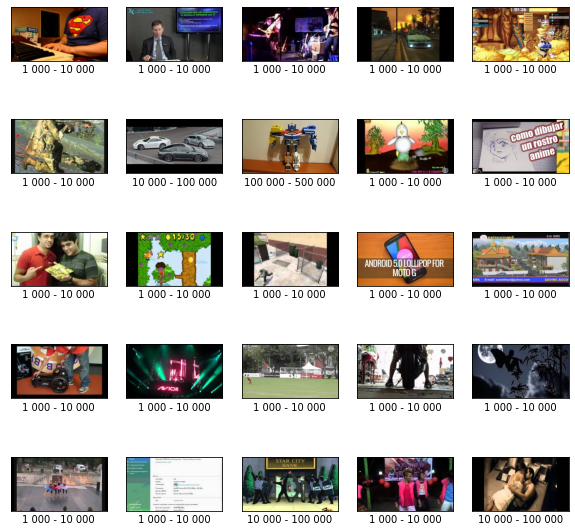

In [6]:
class_names = ['1 000 - 10 000', '10 000 - 100 000', '100 000 - 500 000', '500 000 - 1 000 000',
               'mas 1 000 000']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainImages[i])
    plt.xlabel(class_names[trainLabels[i]])
plt.show()

2000 2000 2000 292 307


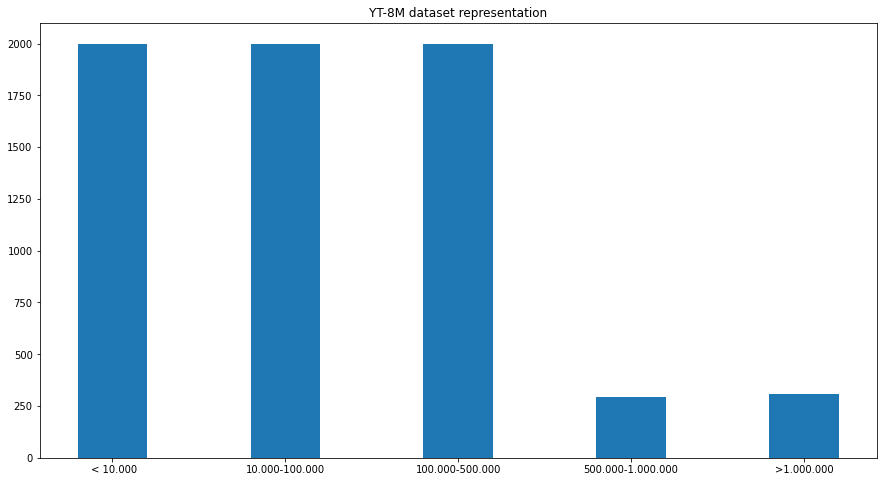

In [7]:
x_axis = [' < 10.000', '10.000-100.000', '100.000-500.000', '500.000-1.000.000',
               '>1.000.000']
y_axis = [trainLabels.count(0), trainLabels.count(1), trainLabels.count(2), trainLabels.count(3), trainLabels.count(4)]
print(y_axis[0],y_axis[1],y_axis[2],y_axis[3],y_axis[4])
plt.figure(figsize=(15,8)) 
plt.bar(x_axis, y_axis, width = 0.4,)
plt.title("YT-8M dataset representation")
plt.show()

In [8]:
#hay que pasar a one hot

trainLabels = keras.utils.to_categorical(trainLabels, 6)

In [9]:
#print(trainImages.shape)
#print(trainImages[0].shape)  

In [10]:
#Convertimos trainImages y valImages a ndarray, esto para poder usarlos despues
#ya que algunas funciones requieren que sean npdarray y no listas de python
#print(trainImages.shape)
#print(trainImages[0].shape)

#print(type(trainImages))
#print(trainImages[0].shape)

#for i in range(len(trainImages)):
#  print(trainImages[i].shape)

trainImages = np.asarray(trainImages)
trainLabels = np.asarray(trainLabels)


#Y ahora que son ndarrays los normalizamos y expandemos la dim para que calze en
#la red
#trainImages[0]  = trainImages[0].astype("float32") / 255
print(trainImages.shape)
print(trainImages[0].shape)
trainImages = trainImages.astype("float32") / 255
#for i in range(len(trainImages)):
  #trainImages[i] = trainImages[i].astype("float32") / 255
  #print(i)

#trainImages = trainImages.astype("float32") / 255
#esto tira error, asique se convierte cada imagen, una a una
#trainImages = np.expand_dims(trainImages, -1)

#print(trainImages.shape)

(6599, 180, 320, 3)
(180, 320, 3)


In [11]:
#hay que hacer un shuffle ahora
#import random



#c = list(zip(trainImages, trainLabels))

#random.shuffle(c)

#trainImages, trainLabels = zip(*c)


In [12]:
print((trainLabels[:10]))

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [13]:

simpleCNN = Sequential()
simpleCNN.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(180,320,3)))
simpleCNN.add(Dropout(0.25))
simpleCNN.add(MaxPooling2D(pool_size=(2, 2)))
#
simpleCNN.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
simpleCNN.add(Dropout(0.25))
simpleCNN.add(MaxPooling2D(pool_size=(2, 2)))
#
simpleCNN.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
simpleCNN.add(Dropout(0.25))
simpleCNN.add(MaxPooling2D(pool_size=(2, 2)))
#
simpleCNN.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
simpleCNN.add(Dropout(0.25))
simpleCNN.add(MaxPooling2D(pool_size=(2, 2)))
#
simpleCNN.add(Flatten())
simpleCNN.add(layers.Dense(64, activation='relu'))
simpleCNN.add(Dropout(0.35))
simpleCNN.add(layers.Dense(6, activation='sigmoid'))

#simpleCNN.add(layers.Dense(6, activation='sigmoid'))

In [14]:
simpleCNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 318, 64)      1792      
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 178, 318, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 159, 64)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 157, 64)       36928     
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 87, 157, 64)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 78, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 76, 64)        3

In [15]:
early_s_p = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", min_delta = 0.010, patience = 10, restore_best_weights=True)
#simpleCNN.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer="adam", metrics=["accuracy"])
simpleCNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [16]:
history = simpleCNN.fit(trainImages, trainLabels, epochs=40, validation_split=0.2)

Epoch 1/40
165/165 [==============================] - 66s 129ms/step - loss: 1.3566 - accuracy: 0.3772 - val_loss: 1.7797 - val_accuracy: 0.0000e+00
Epoch 2/40
165/165 [==============================] - 19s 116ms/step - loss: 1.2774 - accuracy: 0.3809 - val_loss: 1.8475 - val_accuracy: 0.0000e+00
Epoch 3/40
165/165 [==============================] - 19s 117ms/step - loss: 1.2693 - accuracy: 0.3758 - val_loss: 1.9882 - val_accuracy: 0.0000e+00
Epoch 4/40
165/165 [==============================] - 19s 117ms/step - loss: 1.2441 - accuracy: 0.3830 - val_loss: 1.8504 - val_accuracy: 0.0000e+00
Epoch 5/40
165/165 [==============================] - 19s 116ms/step - loss: 1.2689 - accuracy: 0.3832 - val_loss: 1.9893 - val_accuracy: 0.0000e+00
Epoch 6/40
165/165 [==============================] - 19s 117ms/step - loss: 1.2565 - accuracy: 0.3705 - val_loss: 1.8858 - val_accuracy: 0.0000e+00
Epoch 7/40
165/165 [==============================] - 19s 117ms/step - loss: 1.2498 - accuracy: 0.3814 - v

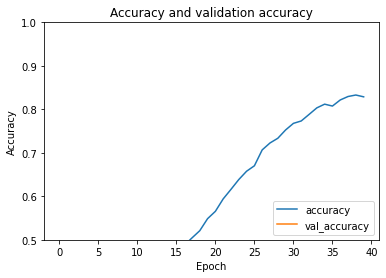

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Accuracy and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')